<a href="https://colab.research.google.com/github/VinodKumar9576/TMDB-Prediction/blob/master/TMDB Prediction/EDA.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

* In the previous notebook we have processed some features and made some new features based on the categories in train and test data sets.
* We are loading that data below as we already saved it.

In [0]:
!pip install swifter
!pip install fastparquet

In [0]:
import swifter
import fastparquet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

* Reading the saved train and test data

In [0]:
if os.path.isfile('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/Istage_feat_train.parquet.gzip'):
  train_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/Istage_feat_train.parquet.gzip', engine = 'fastparquet')
else:
  print('Istage train feature file is not found. Check the path or run the previous notebook')

if os.path.isfile('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/Istage_feat_test.parquet.gzip'):
  test_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/Istage_feat_test.parquet.gzip', engine = 'fastparquet')
else:
  print('Istage test feature file is not found. Check the path or run the previous notebook')

In [0]:
#replacing 'nan' strings with 'NaN'
#As the columns in our data are in object format and all the 'nan' values are in string format 
#and so we are replacing them with actual NaN so that it will be useful for processing.
train_df.replace(['None', 'nan'], np.nan, inplace=True)
test_df.replace(['None', 'nan'], np.nan, inplace=True)

In [0]:
train_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 238 entries, id to departments_Actors
dtypes: float64(2), int64(224), object(12)
memory usage: 5.4+ MB


* All columns are of object type we'll change the type of columns according to our needs at later stage.

# **Checking the distribution and feasibility of numerical features**

## **Output variable - Revenue**

In [0]:
train_df['revenue'].head(2)

0    12314651
1    95149435
Name: revenue, dtype: int64

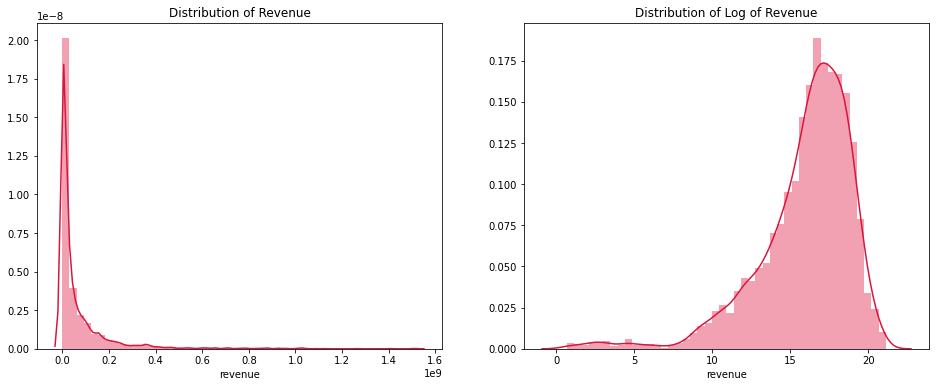

In [0]:
fig, ax = plt.subplots(figsize = (16,6))

plt.subplot(1,2,1)
sns.distplot(a = train_df['revenue'], color = 'crimson')
plt.title('Distribution of Revenue')

plt.subplot(1,2,2)
sns.distplot(a = np.log1p(train_df['revenue']), color = 'crimson')
plt.title('Distribution of Log of Revenue')

plt.show()

* We can see from above, that revenue data is highly skewed and after applying log, data is slightly positively skewed but better than original data.

In [0]:
train_df['log_revenue'] = np.log1p(train_df['revenue'])

* We have revenue and log_revenue both in our data set as of now.

##**Budget**

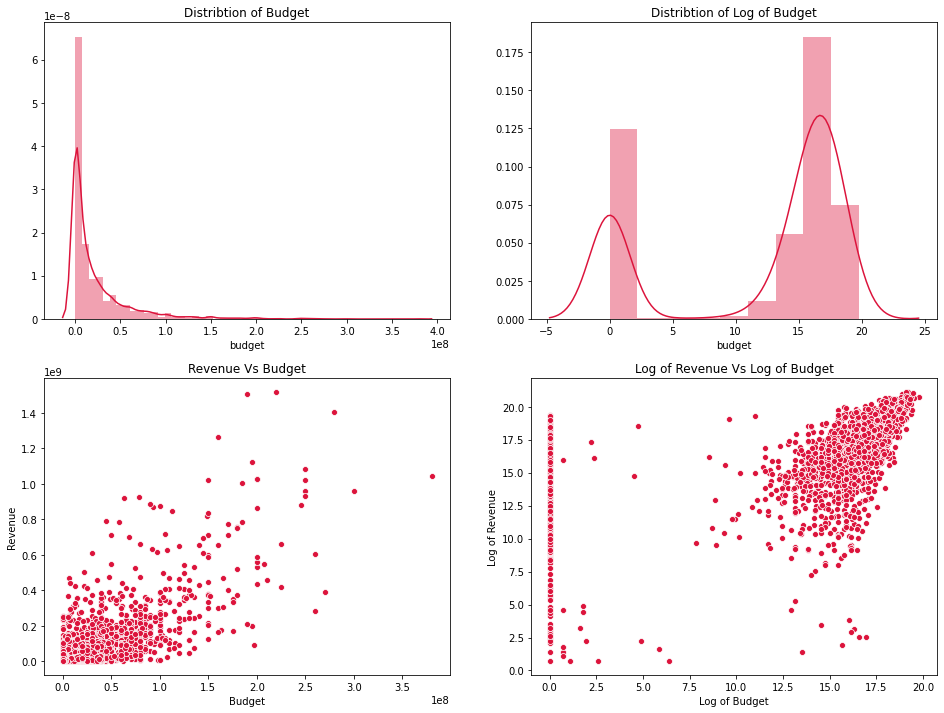

In [0]:
fig, ax = plt.subplots(figsize = (16,12))

plt.subplot(2,2,1)
sns.distplot(a = train_df['budget'], color = 'crimson')
plt.title('Distribtion of Budget')

plt.subplot(2,2,2)
sns.distplot(a = np.log1p(train_df['budget']), color = 'crimson')
plt.title('Distribtion of Log of Budget')

#correlations
plt.subplot(2,2,3)
sns.scatterplot(x = train_df['budget'], y = train_df['revenue'], color = 'crimson')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue Vs Budget')

plt.subplot(2,2,4)
sns.scatterplot(x = np.log1p(train_df['budget']), y = train_df['log_revenue'], color = 'crimson')
plt.xlabel('Log of Budget')
plt.ylabel('Log of Revenue')
plt.title('Log of Revenue Vs Log of Budget')

fig.show()

* We can see that Budget and Revenue are some what correlated and only few points are in relation when raw values are plotted.
* After plotting both transformed columns (subplot 4) , we can see much improved relation between them.

* Appyting log of budget in train and test sets.

In [0]:
train_df['log_budget'] = np.log1p(train_df['budget'])
test_df['log_budget'] = np.log1p(test_df['budget'])

## **Homepage**

In [0]:
train_df['homepage'].value_counts().head()

http://www.transformersmovie.com/      4
http://www.thehobbit.com/              2
http://www.lordoftherings.net/         2
http://www.sonyclassics.com/capote/    1
http://noonelivesthemovie.com/         1
Name: homepage, dtype: int64

* Most of the films are not having homepage for them (2054).
* And the rest will be unique each page for each movie.

In [0]:
#making binary column 'has_column'
train_df['has_homepage'] = 0
train_df.loc[train_df['homepage'].isnull() == False, 'has_homepage'] = 1

test_df['has_homepage'] = 0
test_df.loc[test_df['homepage'].isnull() == False, 'has_homepage'] = 1

In [0]:
train_df.head(1)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.3263,16.454568,0


In [0]:
test_df.head(1)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),...,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage
0,3001,0,http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,7/14/07,90.0,Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,Pokémon Collection,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0,1


In [0]:
train_df['has_homepage'].value_counts()

0    2054
1     946
Name: has_homepage, dtype: int64

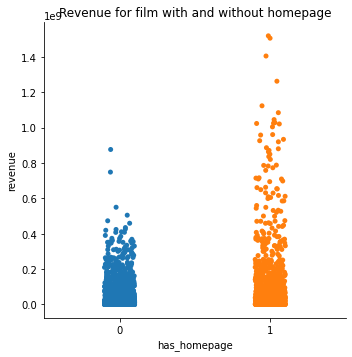

In [0]:
sns.catplot(x = 'has_homepage', y = 'revenue', data = train_df)

plt.title('Revenue for film with and without homepage')
plt.show()

* We see that movies with homepage tend to generate more revenue.
* This way we know that people can know more about the film through homepage.

In [0]:
train_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.326300,16.454568,0
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,18.370959,17.504390,0


In [0]:
test_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),...,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage
0,3001,0,http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,7/14/07,90.0,Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,Pokémon Collection,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,1
1,3002,88000,None,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,5/19/58,65.0,Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,None,0,2,Horror Science Fiction,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,6,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,2,1,0,0,1,1,1,1,1,0,0,0,11.385103,0


## **original_language**

* Plotting mean revenue per language & Mean log revenue per language

In [0]:
for i in train_df.columns:
    print(i, type(train_df[i][0]))

id <class 'numpy.int64'>
budget <class 'numpy.int64'>
homepage <class 'NoneType'>
imdb_id <class 'str'>
original_language <class 'str'>
original_title <class 'str'>
overview <class 'str'>
popularity <class 'numpy.float64'>
poster_path <class 'str'>
release_date <class 'str'>
runtime <class 'numpy.float64'>
status <class 'str'>
tagline <class 'str'>
title <class 'str'>
revenue <class 'numpy.int64'>
Collection_name <class 'str'>
has collection <class 'numpy.int64'>
num_genres <class 'numpy.int64'>
all_genres <class 'str'>
genre_Drama <class 'numpy.int64'>
genre_Comedy <class 'numpy.int64'>
genre_Thriller <class 'numpy.int64'>
genre_Action <class 'numpy.int64'>
genre_Romance <class 'numpy.int64'>
genre_Crime <class 'numpy.int64'>
genre_Adventure <class 'numpy.int64'>
genre_Horror <class 'numpy.int64'>
genre_Science Fiction <class 'numpy.int64'>
genre_Family <class 'numpy.int64'>
genre_Fantasy <class 'numpy.int64'>
genre_Mystery <class 'numpy.int64'>
genre_Animation <class 'numpy.int64'>
g

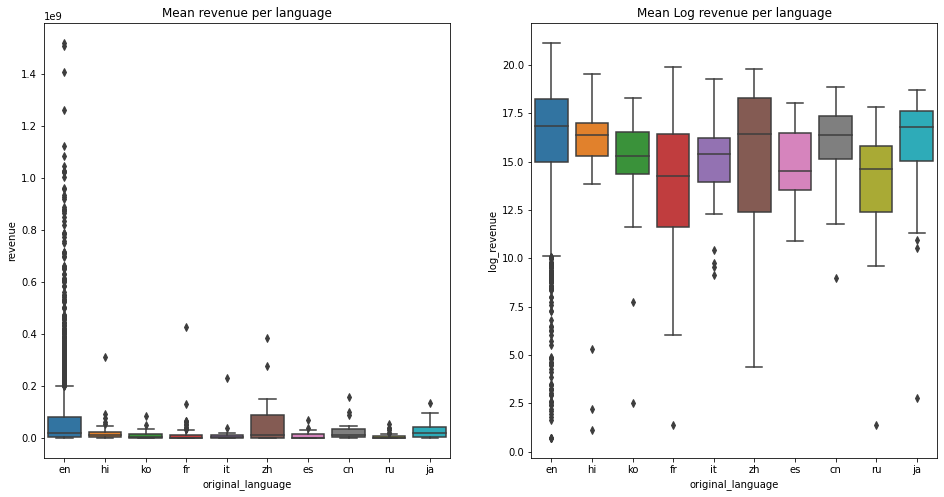

In [0]:
fig, ax = plt.subplots(figsize=(16,8))

plt.subplot(1,2,1)
#taking data of only top 10 original_languages and making box plots
mean_rev_per_lang = train_df.loc[train_df['original_language'].isin(train_df['original_language'].value_counts().head(10).index)]
sns.boxplot(x = 'original_language', y = 'revenue', data=mean_rev_per_lang)
plt.title('Mean revenue per language')

plt.subplot(1,2,2)
sns.boxplot(x = 'original_language', y = 'log_revenue', data = mean_rev_per_lang)
plt.title('Mean Log revenue per language')

fig.show()

* As we generally know that there are much more english films and they have a higher range of values and market over the world.
* From the plot, there are films with high revenue in other languages alos such as 'zh'.

## **original_title**

* Lets us see which are the most common words used in titles of the films.

In [0]:
from wordcloud import WordCloud

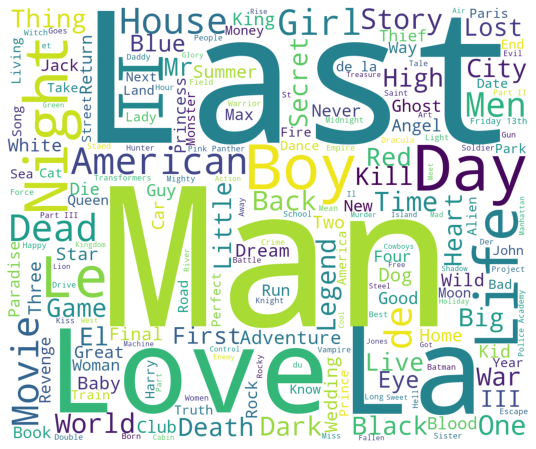

In [0]:
plt.figure(figsize=(16,8))
text = ' '.join(train_df['original_title'].values)
wordcloud = WordCloud(background_color = 'white',
                      max_font_size = None,
                      width = 1200,
                      height = 1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* We can see the words 'Man', 'Last', 'Love' appear more frequent in titles.

##**overview**

* Lets see the most common used words in overview.

In [0]:
train_df['overview'] = train_df['overview'].fillna('')

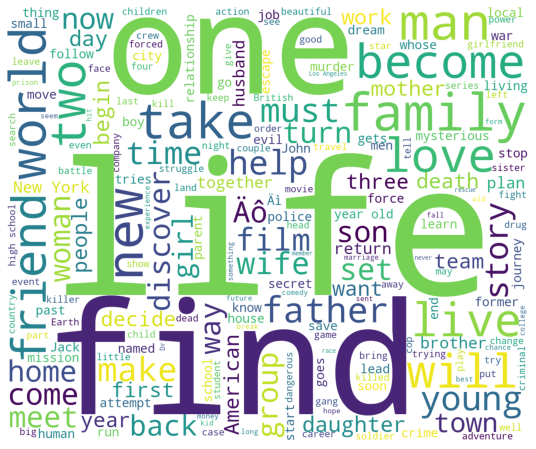

In [0]:
plt.figure(figsize=(16,8))
text = ' '.join(train_df['overview'].fillna('').values)
wordcloud = WordCloud(background_color = 'white',
                      max_font_size = None,
                      width = 1200,
                      height = 1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Let's try to see which words from 'overview' have high impact on the revenue.
* For this we are going to build a simple model and use ELI5 for this.

In [0]:
train_df[train_df['overview'].isnull()==True]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage


In [0]:
!pip install eli5

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import eli5

In [0]:
vectorizer = TfidfVectorizer(sublinear_tf = True,
                             analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             ngram_range = (1,2),
                             min_df = 5)

overview_text = vectorizer.fit_transform(train_df['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, train_df['log_revenue'])
eli5.show_weights(linreg, vec = vectorizer, top = 20, feature_filter = lambda x: x != '<BIAS>')

* Lets run for one example overview and see what words in that overview text contribute most to the output variable 'revenue'.

* Below we are taking the sample of overview 1000th value and seeing on 1000th revenue value.

In [0]:
print('Target value :', train_df['log_revenue'][1000])
eli5.show_prediction(linreg, doc = train_df['overview'].values[1000], vec = vectorizer)

Target value : 16.44583954907521


* We can see that some words can be used to predict revenue, but we will need more words from overview text to build a good model.

##**popularity**

* There's no proper information on 'popularity' so doesn't know much what this column means.
* Lets plot and see the correlation between output variable.

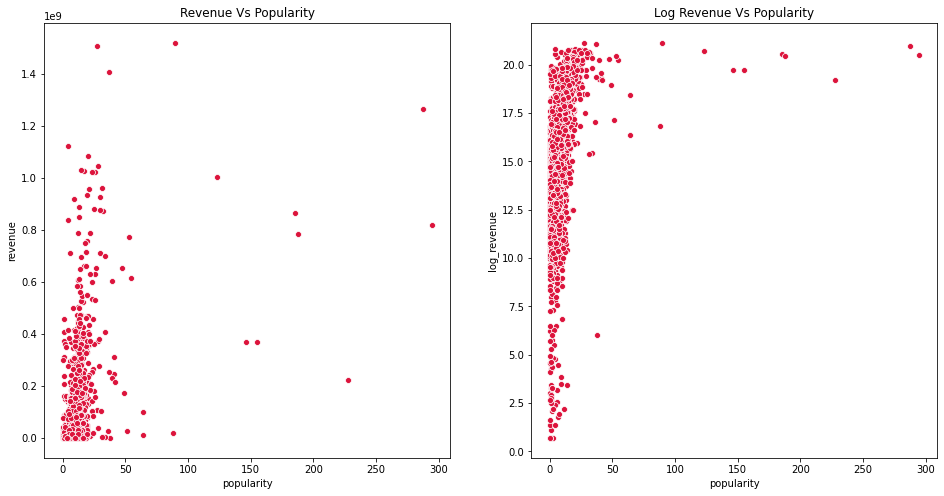

In [0]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.scatterplot(train_df['popularity'], train_df['revenue'], color='crimson')
plt.title('Revenue Vs Popularity')

plt.subplot(1,2,2)
sns.scatterplot(train_df['popularity'], train_df['log_revenue'], color='crimson')
plt.title('Log Revenue Vs Popularity')

plt.show()

* It seems that popularity and revenue are not that much correlated.

##**release_date**

In [0]:
test_df[test_df['release_date'].isnull() == True]

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),...,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage
828,3829,0,None,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,None,None,90.0,None,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",None,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0


* Found one row with Nan value of 'release_date' and we impute it with another year.

In [0]:
test_df.loc[test_df['release_date'].isnull() == True, 'release_date'] = '01/01/98'

In [0]:
train_df['release_date']

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

* With the below function we are fixing the release date with full year.
* If you find the year in release_date less than 19 (as current year is 2019) think of it as recent movie and prefix year with '20'.
* If its greater, prefix it with '19'.

In [0]:
def fix_date(x):
  """
  Fixing dates which are in format 20xx
  """
  year = x.split('/')[2]
  if int(year) <= 19:
    return x[:-2] + '20' + year
  else:
    return x[:-2] + '19' + year

In [0]:
train_df['release_date'] = train_df['release_date'].apply(lambda x: fix_date(x))
test_df['release_date'] = test_df['release_date'].apply(lambda x: fix_date(x))

train_df['release_date'] = pd.to_datetime(train_df['release_date'])
test_df['release_date'] = pd.to_datetime(test_df['release_date'])

In [0]:
train_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.326300,16.454568,0
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,18.370959,17.504390,0


* Lets create features based on dates.

In [0]:
def process_dates(df):

  date_parts = ['year', 'weekday', 'month', 'weekofyear', 'day', 'quarter']

  for part in date_parts:
    part_col = 'release_date' + '_' + part
    df[part_col] = getattr(df['release_date'].dt, part).astype(int)

  return df

train_df = process_dates(train_df)
test_df = process_dates(test_df)

In [0]:
train_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.326300,16.454568,0,2015,4,2,8,20,1
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,18.370959,17.504390,0,2004,4,8,32,6,3


In [0]:
test_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,3001,0,http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,2007-07-14,90.0,Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,Pokémon Collection,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,1,2007,5,7,28,14,3
1,3002,88000,None,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,1958-05-19,65.0,Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,None,0,2,Horror Science Fiction,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,2,0,6,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,2,1,0,0,1,1,1,1,1,0,0,0,11.385103,0,1958,0,5,21,19,2


* Now we have the columns 'release year', 'weekday', 'month', 'weekofyear', 'day' and finally 'quarter'.
* Lets plot few things based on these columns.

* **Number of films per year**

In [0]:
import plotly.graph_objects as go
import plotly as py

In [0]:
tr = train_df['release_date_year'].value_counts().sort_index()
te = test_df['release_date_year'].value_counts().sort_index()

fig = go.Figure(data = [go.Scatter(x = tr.index, y = tr.values, name = 'train'),
                  go.Scatter(x = te.index, y = te.values, name = 'test')])

fig.update_layout(
    title = 'Number of films per year',
    title_x = 0.5,
    xaxis_title = 'Year',
    yaxis_title = 'Count'
)

fig.show()

* **Number of films and average revenue per year**

In [0]:
train_df['release_date_year'].value_counts()


2013    141
2015    128
2010    126
2016    125
2012    125
       ... 
1952      1
1938      1
1935      1
1921      1
1924      1
Name: release_date_year, Length: 90, dtype: int64

In [0]:
d1 = train_df['release_date_year'].value_counts().sort_index()
d2 = train_df.groupby('release_date_year')['revenue'].agg('mean')

fig = go.Figure(data = [go.Scatter(x = d1.index, y = d1.values, name = 'film count'),
                  go.Scatter(x = d2.index, y = d2.values, name = 'mean revenue', yaxis = 'y2')])


fig.update_layout(
    barmode = 'group',
    title = 'Number of films and average revenue per year',
    title_x = 0.5,
    xaxis_title = 'Year',
    yaxis_title = 'Count',
    yaxis2 = dict(title = 'Average revenue', overlaying = 'y', side = 'right')
)
fig.show()

* We can see that number of films and total revenue are growing, which is to be expected.
* But there were some years in the past such as films "<1980" with a high number of successful films, which brought high revenue.

* **Lets plot revenue on different days of week of release**

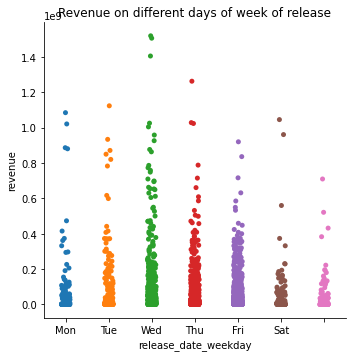

In [0]:
sns.catplot(x = 'release_date_weekday', y = 'revenue', data = train_df)
plt.title('Revenue on different days of week of release')
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

* Surprisingly films released on Wednesdays and on Thursdays tend to have a high revenue.

In [0]:
train_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.326300,16.454568,0,2015,4,2,8,20,1
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,18.370959,17.504390,0,2004,4,8,32,6,3


In [0]:
test_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,3001,0,http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,2007-07-14,90.0,Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,Pokémon Collection,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,1,2007,5,7,28,14,3
1,3002,88000,None,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,1958-05-19,65.0,Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,None,0,2,Horror Science Fiction,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,2,0,6,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,2,1,0,0,1,1,1,1,1,0,0,0,11.385103,0,1958,0,5,21,19,2


##**runtime**

* runtime given is the length of the films in minutes.
* Lets plot the length of the film in hours.

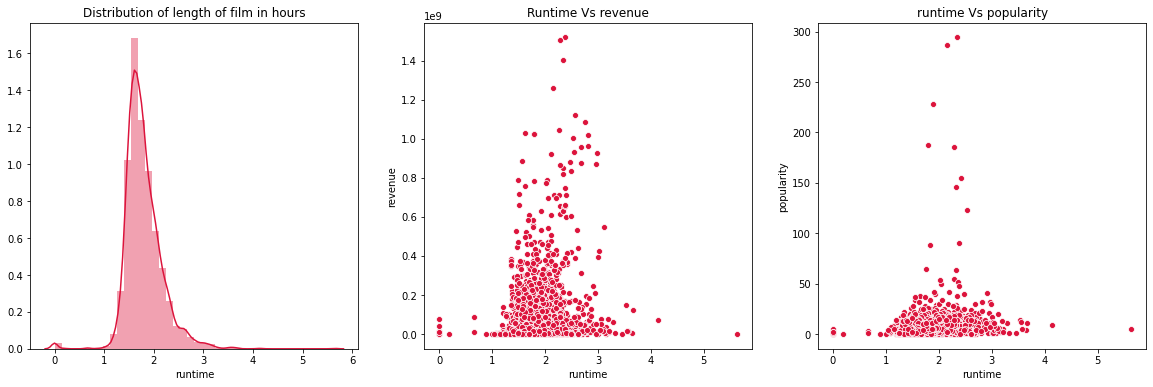

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(train_df['runtime'].fillna(0)/60, bins = 40, color = 'crimson')
plt.title('Distribution of length of film in hours')

plt.subplot(1,3,2)
sns.scatterplot(x = train_df['runtime'].fillna(0)/60, y = train_df['revenue'], color = 'crimson')
plt.title('Runtime Vs revenue')

plt.subplot(1,3,3)
sns.scatterplot(x = train_df['runtime'].fillna(0)/60, y = train_df['popularity'], color = 'crimson')
plt.title('runtime Vs popularity')

plt.show()

* From above plots we can see that most of the films are of 1.5 - 2 hours long and most of the films that made high revenue are also of same length.

##**Status**

In [0]:
train_df['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [0]:
train_df[train_df['status'] == 'Rumored']

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
609,610,0,None,tt0120254,en,The Swan Princess: Escape from Castle Mountain,The first wedding anniversary of Princess Odet...,5.121309,/oTEgvTpAIugS7OH6oIoVZkmV3C3.jpg,1997-01-01,71.0,Rumored,It Will Take All Her Magic to Rescue Her Friends!,The Swan Princess: Escape from Castle Mountain,273644,Swan Princess Series,1,4,Animation Family Fantasy Romance,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,12.519587,0.000000,0,1997,2,1,1,1,1
1007,1008,0,None,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,/3ypM4bwZTvUfXiKJTs0BaEZuBhe.jpg,2011-02-05,60.0,Rumored,None,Billy Gardell: Halftime,60,None,0,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,7,0,1,1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,1,0,0,1,0,1,0,0,4.110874,0.000000,0,2011,5,2,5,5,1
1216,1217,0,None,tt0091024,en,Extremities,A woman escapes from the man who is about to r...,10.273979,/pMN14kaump5CrzbSl1C0a2E0M4f.jpg,1986-08-22,89.0,Rumored,"When fear made her a victim, she turned fear i...",Extremities,13418091,None,0,2,Drama Thriller,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,5,2,9,1,1,1,1,1,2,1,1,0,1,1,0,0,0,0,6,1,1,0,2,1,1,2,1,0,1,0,16.412115,0.000000,0,1986,4,8,34,22,3
1618,1619,891000,None,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,/4j9U7QMT5D5HhUoIsoAI1niVqz8.jpg,1998-02-20,89.0,Rumored,Inside the world's first postmodern revolution,A Place Called Chiapas,229000,None,0,1,Documentary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12.341482,13.700101,0,1998,4,2,8,20,1


In [0]:
test_df['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

* We can see that 4 from train data and 7 from test data aren't released yet.
* So we don't know how these made revenue. Lets keep them for now and see if we can see these lines later.

In [0]:
test_df[test_df['status'] == 'Rumored']

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
102,3103,0,None,tt0093104,it,"Good Morning, Babilonia",After the bankruptcy of their father's stonema...,1.077673,/uBSmrz4P7fuHzOThIi8O1Lu6Dm6.jpg,1987-05-13,117.0,Rumored,None,"Good Morning, Babylon",None,0,2,Drama Romance,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,4,0,2,1,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,2,0,1,2,0,0,0,0,0.000000,0,1987,2,5,20,13,2
1477,4478,3000000,None,tt1414840,ru,Любовь-морковь 2,In this sequel of Lovey-Dovey Andrey and Marin...,1.161030,/8zQbqWlV9G83A4ZJmKHFPTHpPD8.jpg,2008-12-23,100.0,Rumored,None,Lovey-Dovey 2,Lovey-Dovey Collection,1,2,Comedy Fantasy,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,...,0,0,2,0,8,3,1,1,0,0,0,1,0,0,0,0,2,0,0,0,5,1,0,0,2,0,1,1,0,0,0,0,14.914123,0,2008,1,12,52,23,4


##**tagline**

* Lets see what are the most frequent words in tagline of the moves.

In [0]:
train_df['tagline']

0       The Laws of Space and Time are About to be Vio...
1       It can take a lifetime to find true love; she'...
2         The road to greatness can take you to the edge.
3                                                    None
4                                                    None
                              ...                        
2995    It was supposed to be a routine prisoner trans...
2996                                                 None
2997                 What's forgotten is not always gone.
2998    For the most cautious man on Earth, life is ab...
2999            They stole his life. He's taking it back.
Name: tagline, Length: 3000, dtype: object

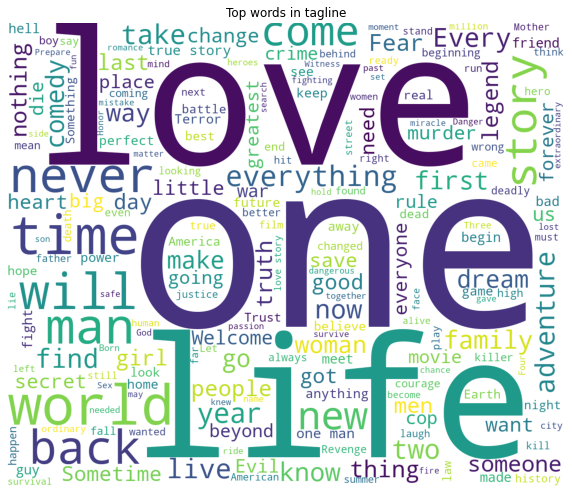

In [0]:
plt.figure(figsize=(10,10))
tags = ' '.join(train_df['tagline'].fillna('').values)
wordcloud = WordCloud(background_color = 'white', max_font_size = None,
                      width = 1200, height = 1000).generate(tags)

plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis('off')
plt.show()

##**Collections**

In [0]:
train_df.head(2)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.326300,16.454568,0,2015,4,2,8,20,1
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,18.370959,17.504390,0,2004,4,8,32,6,3


In [0]:
train_df = train_df.rename(columns = {'has collection':'has_collection'})
test_df = test_df.rename(columns = {'has collection':'has_collection'})

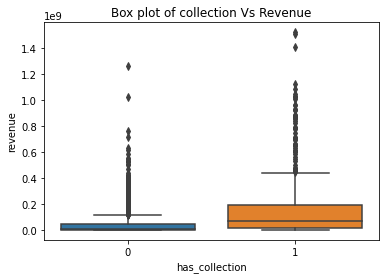

In [0]:
sns.boxplot(x = 'has_collection', y = 'revenue', data = train_df)
plt.title('Box plot of collection Vs Revenue')
plt.show()

* We can see that films that are of collection brought more revenue than single films.
* I assume such series films have a bigger fan base.

##**Genres**

In [0]:
train_df['num_genres']

0       1
1       4
2       1
3       2
4       2
       ..
2995    2
2996    2
2997    4
2998    2
2999    3
Name: num_genres, Length: 3000, dtype: int64

* We can see there films that belong to more than 1 genre.
* Lets plot and see their contribution towards revenue.

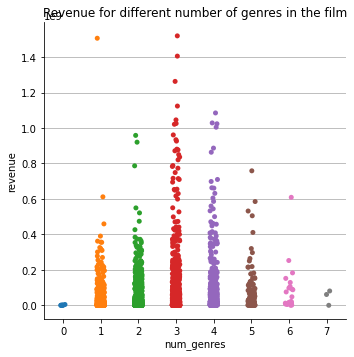

In [0]:
sns.catplot(x = 'num_genres', y = 'revenue', data = train_df)
plt.title('Revenue for different number of genres in the film')
plt.grid(True, axis = 'y')
plt.show()

* **Lets plot violin plots and see the behaviour of genres towards revenue**

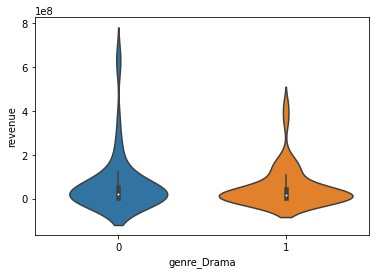

In [0]:
sns.violinplot(x = 'genre_Drama', y = 'revenue', data = train_df[:100])
plt.show()

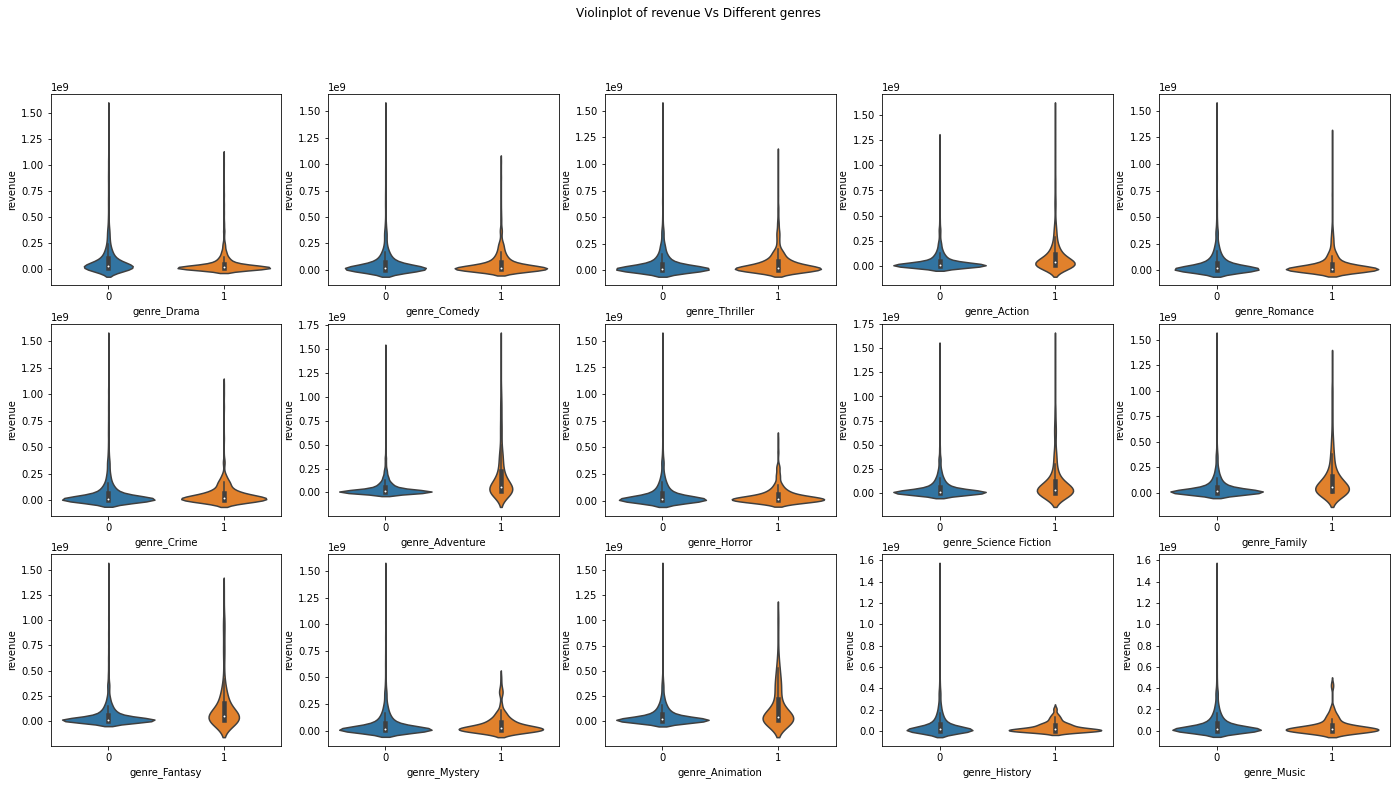

In [0]:
fig , ax = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue Vs Different genres')
for i, e in enumerate([col for col in train_df.columns if 'genre_' in col]):
  sns.violinplot(x = e, y = 'revenue', data = train_df, ax = ax[i//5][i%5])

plt.show()

##**Production Companies**

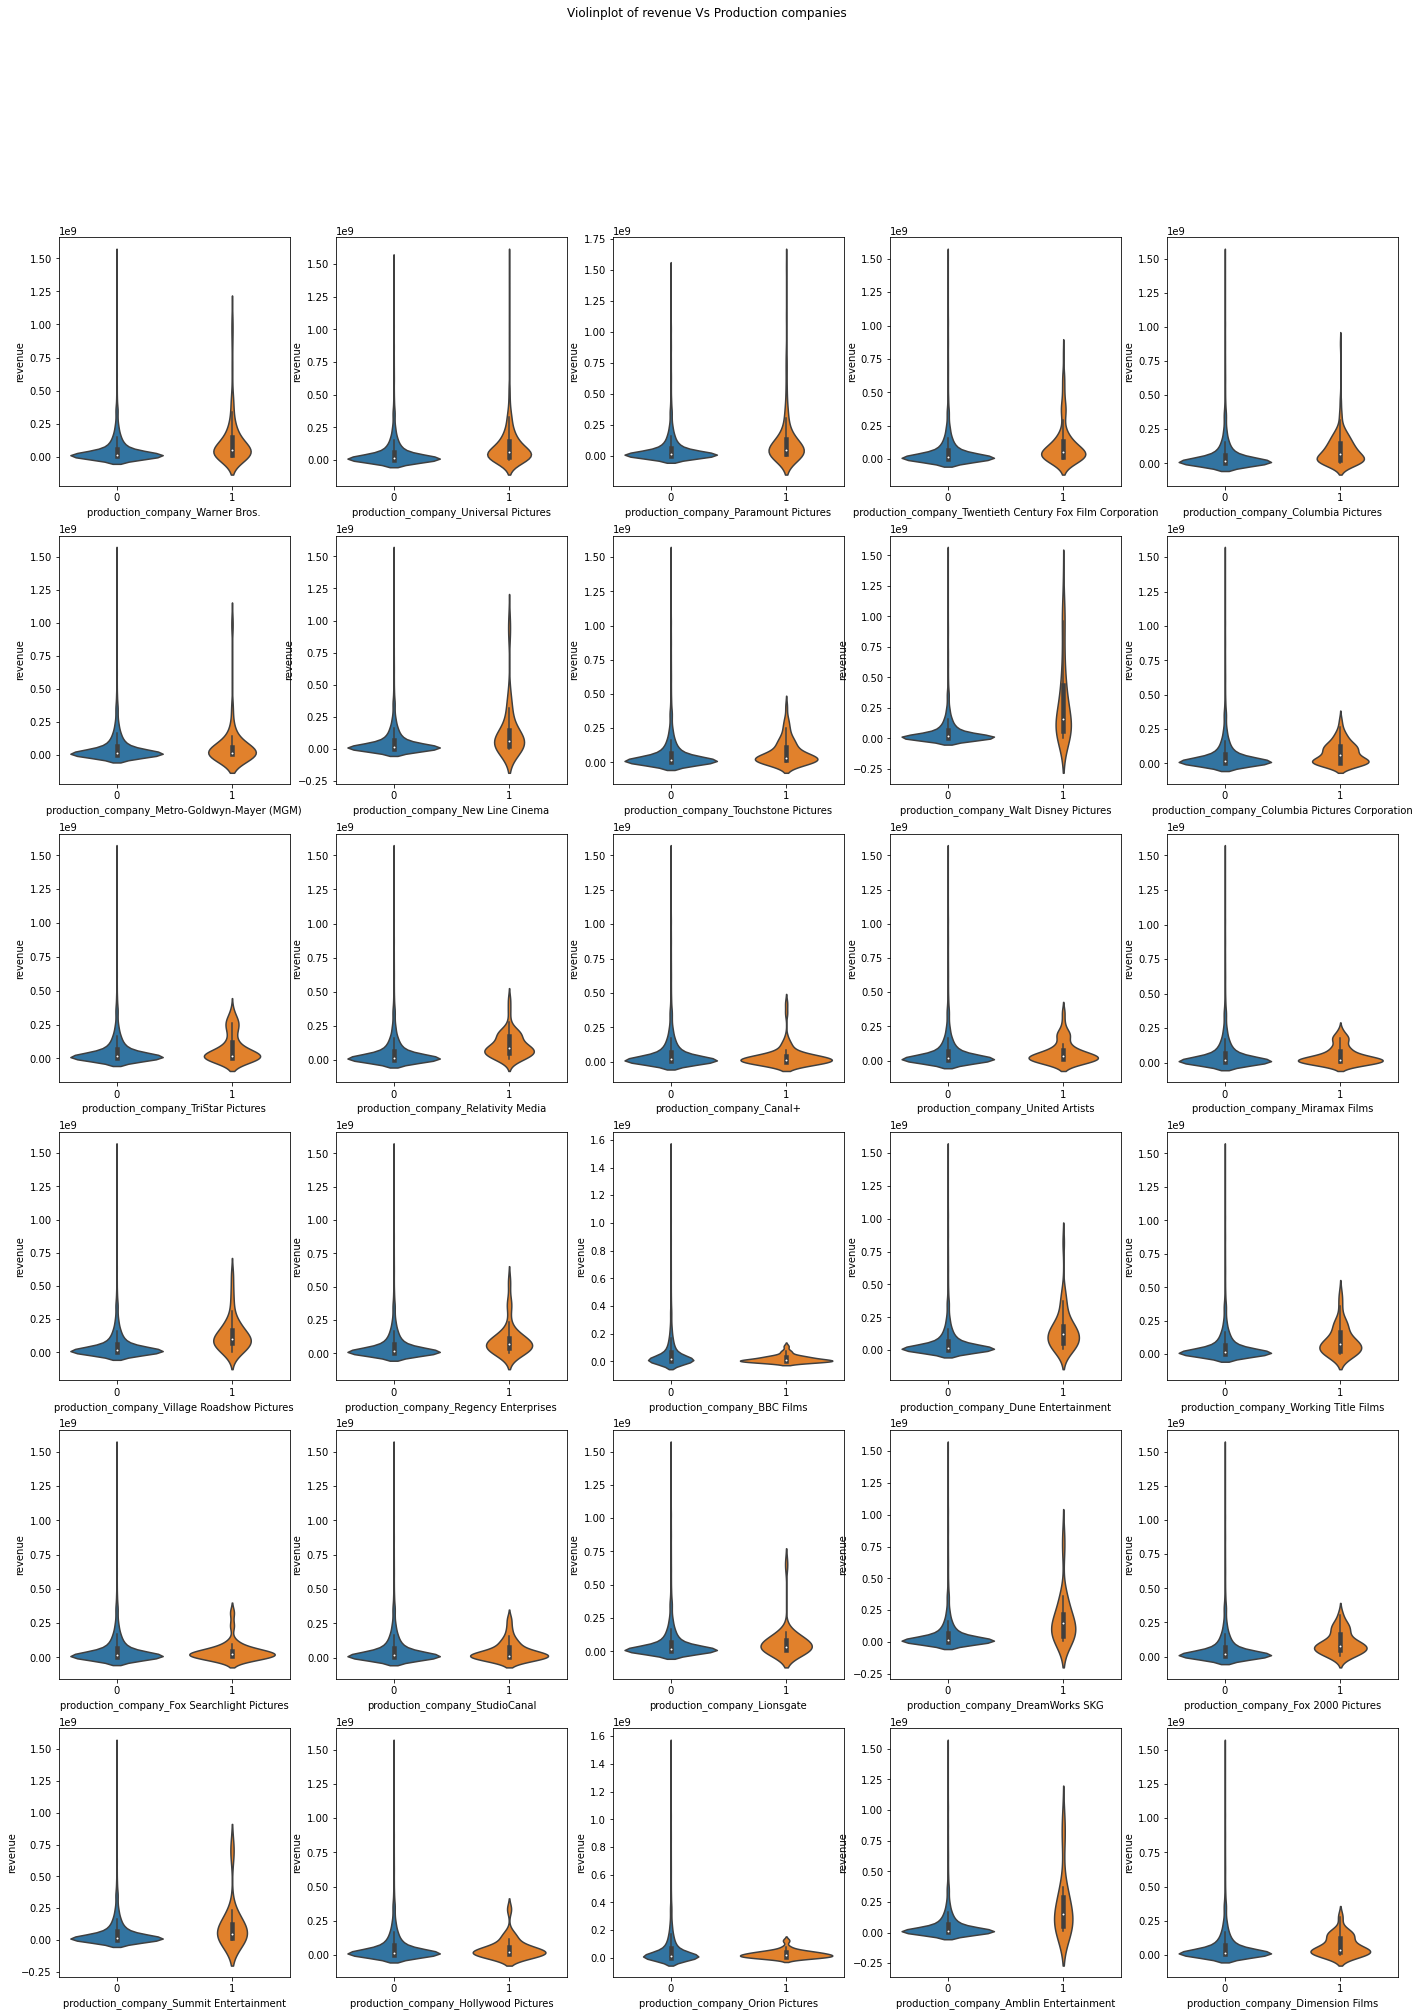

In [0]:
fig , ax = plt.subplots(6, 5, figsize=(24, 32))

for i, e in enumerate([col for col in train_df.columns if 'production_company_' in col]):
  sns.violinplot(x = e, y = 'revenue', data = train_df, ax = ax[i//5][i%5])

plt.suptitle('Violinplot of revenue Vs Production companies')
plt.show()

* There are only very few companies, which have distinctly higher revenues compared to others.

##**Production Countries**

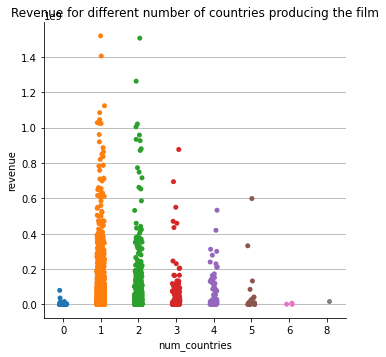

In [0]:
sns.catplot(x = 'num_countries', y = 'revenue', data = train_df)
plt.title('Revenue for different number of countries producing the film')
plt.grid(axis='y')
plt.show()

* Mostly films that were produced by 1-2 companies made high revenue compared to others. These might be most renowed production companies.

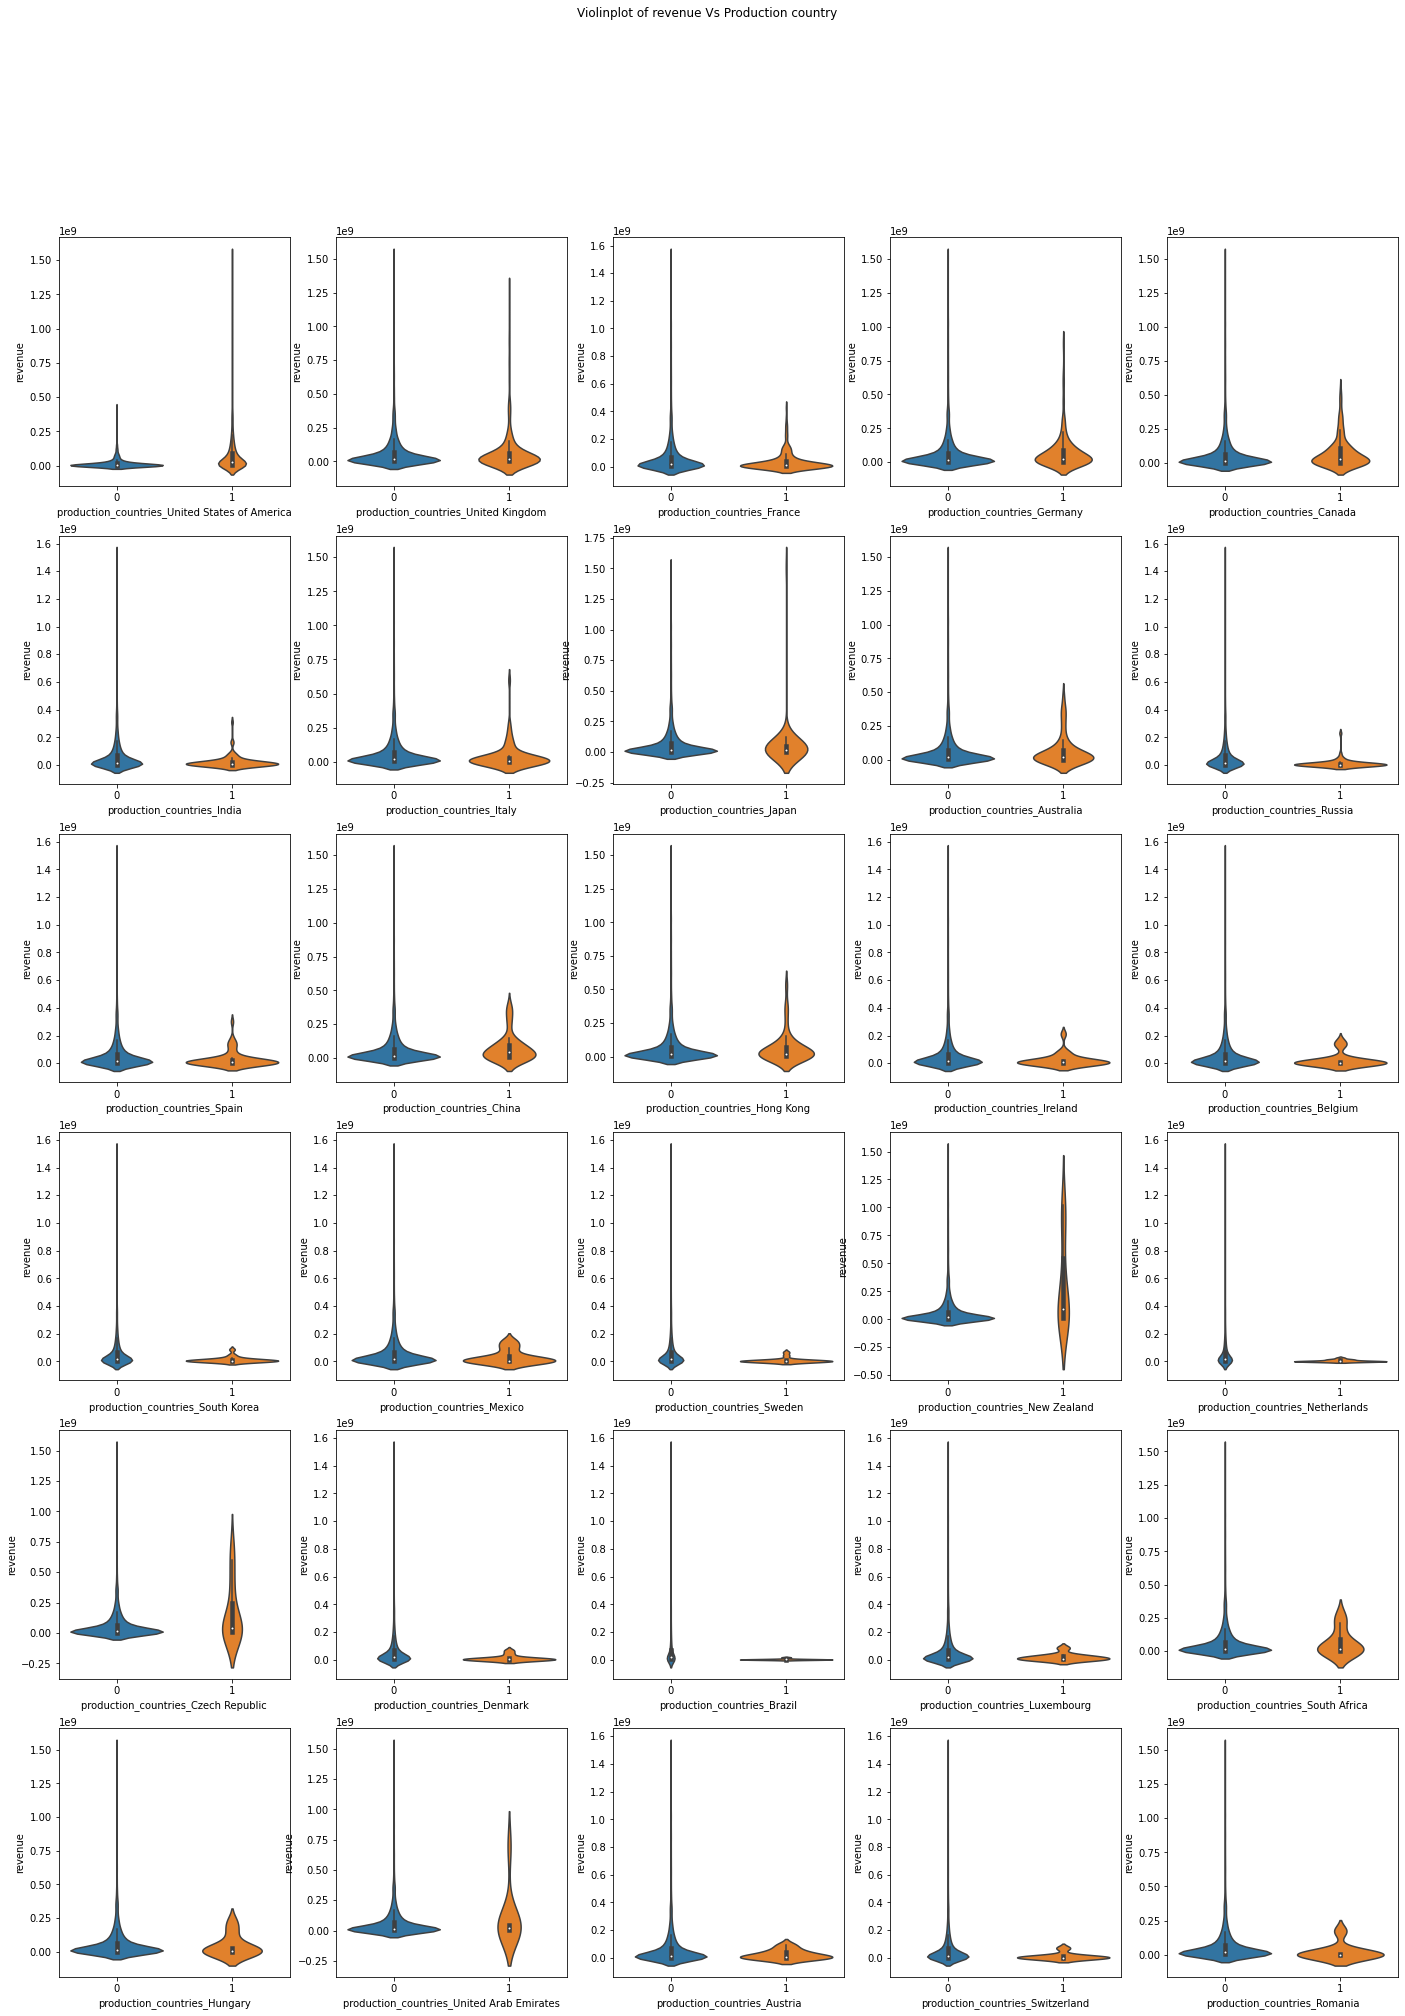

In [0]:
fig , ax = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue Vs Production country')
for i, e in enumerate([col for col in train_df.columns if 'production_countries_' in col]):
  sns.violinplot(x = e, y = 'revenue', data = train_df, ax = ax[i//5][i%5])

plt.show()

* There are couple of countries, which have distinctly higher revenues compared to others.

##**Cast**

In [0]:
train_df['num_cast']

0       24
1       20
2       51
3        7
4        4
        ..
2995    15
2996    11
2997    15
2998    26
2999    34
Name: num_cast, Length: 3000, dtype: int64

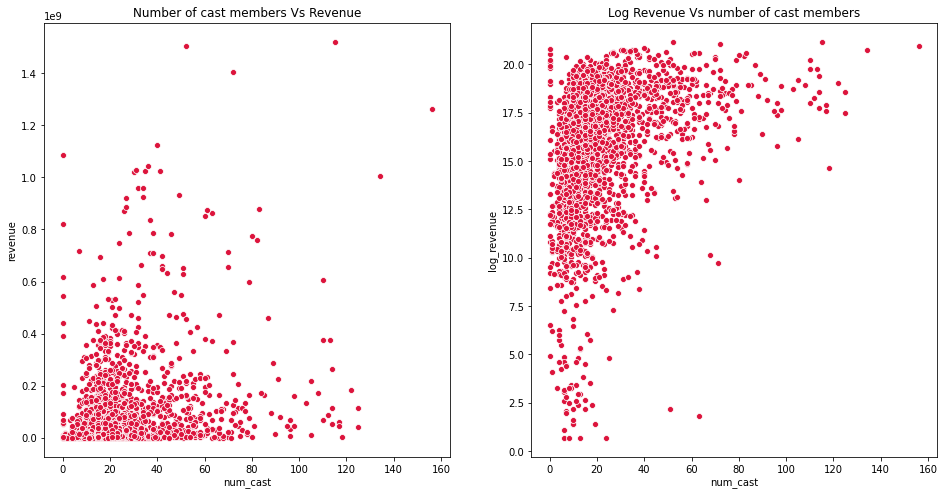

In [0]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.scatterplot(x = train_df['num_cast'], y = train_df['revenue'], color = 'crimson')
plt.title('Number of cast members Vs Revenue')

plt.subplot(1,2,2)
sns.scatterplot(x = train_df['num_cast'], y = train_df['log_revenue'], color = 'crimson')
plt.title('Log Revenue Vs number of cast members')

plt.show()

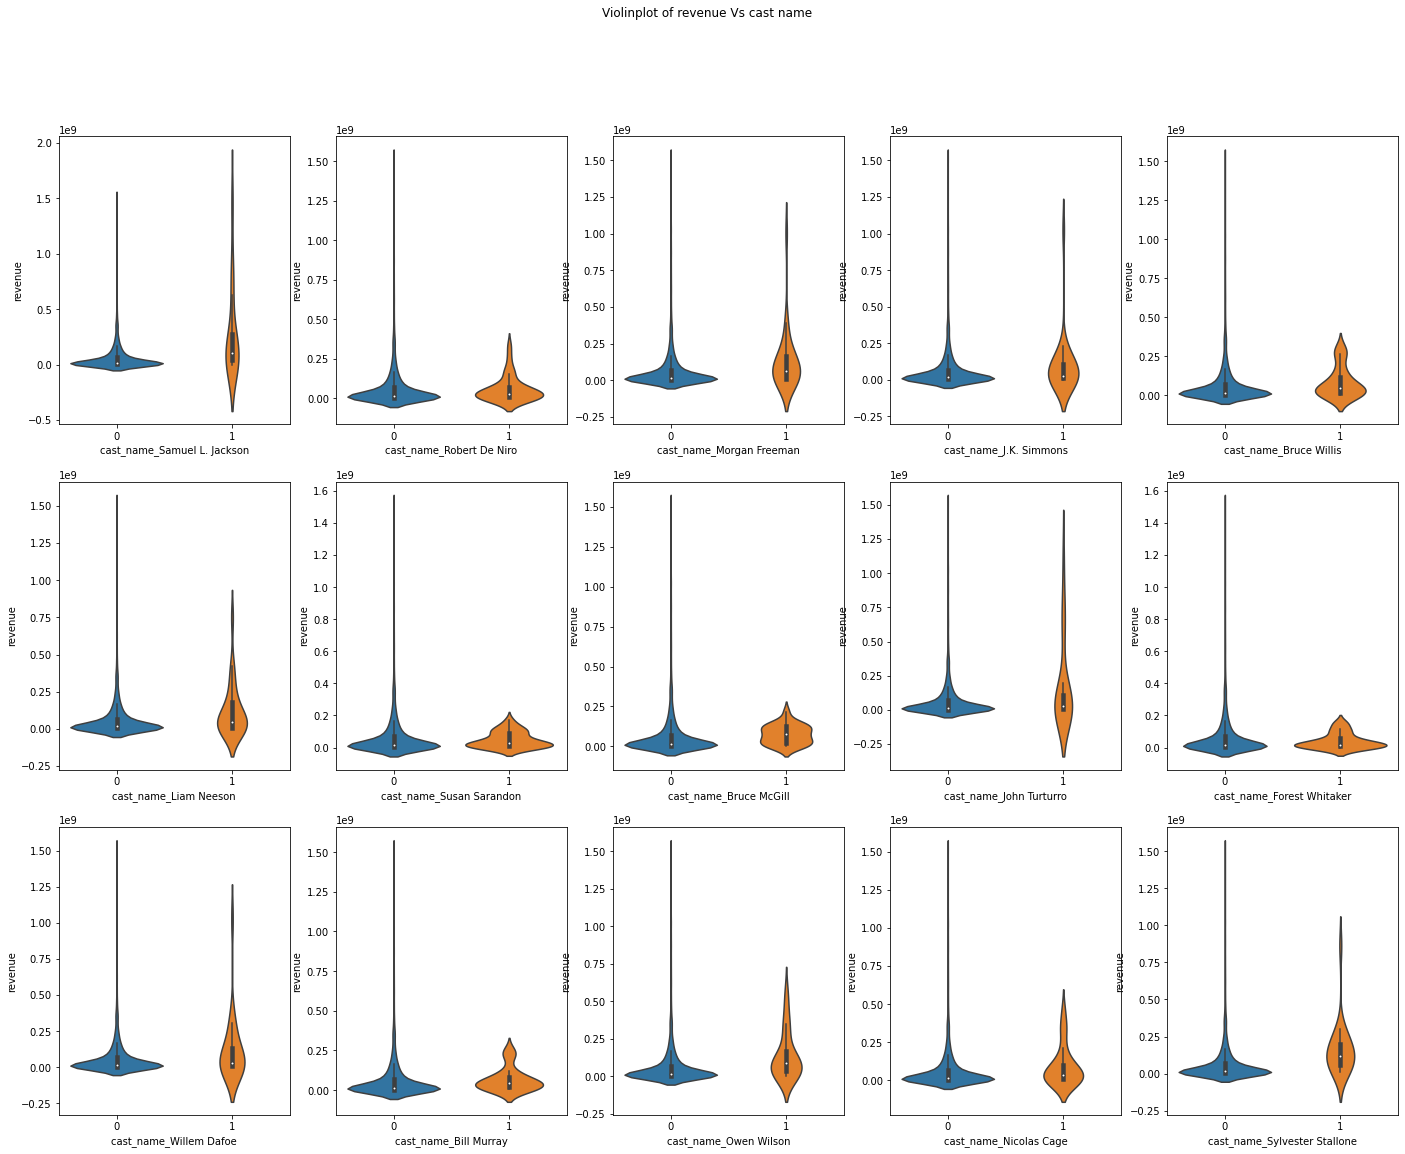

In [0]:
f, ax = plt.subplots(3, 5, figsize = (24, 18))
plt.suptitle('Violinplot of revenue Vs cast name')

for i, e in enumerate([col for col in train_df.columns if 'cast_name' in col]):
  sns.violinplot(x =e, y = 'revenue', data = train_df, ax = ax[i//5, i%5])

plt.show()

* Above represents how each actor contributed to the given revenue.

In [0]:
train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,revenue,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,...,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,None,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,...,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.326300,16.454568,0,2015,4,2,8,20,1
1,2,40000000,None,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,18.370959,17.504390,0,2004,4,8,32,6,3
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,2014-10-10,105.0,Released,The road to greatness can take you to the edge.,Whiplash,13092000,None,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,...,0,49,4,11,4,4,1,1,1,2,1,1,1,1,1,0,1,1,2,18,9,5,9,1,5,4,3,6,3,1,0,16.387512,15.009433,1,2014,4,10,41,10,4
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,2012-03-09,122.0,Released,None,Kahaani,16000000,None,0,2,Drama Thriller,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,16.588099,13.997833,1,2012,4,3,10,9,1
4,5,0,None,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2009-02-05,118.0,Released,None,Marine Boy,3923970,None,0,2,Action Thriller,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,15.182615,0.000000,0,2009,3,2,6,5,1


In [0]:
l =[]
for i in train_df.columns:
  if 'cast_character_' in i:
    l.append(i)

In [0]:
train_df[l]

,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2997,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2998,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


* Need to check what is this empty character from previous data set file.

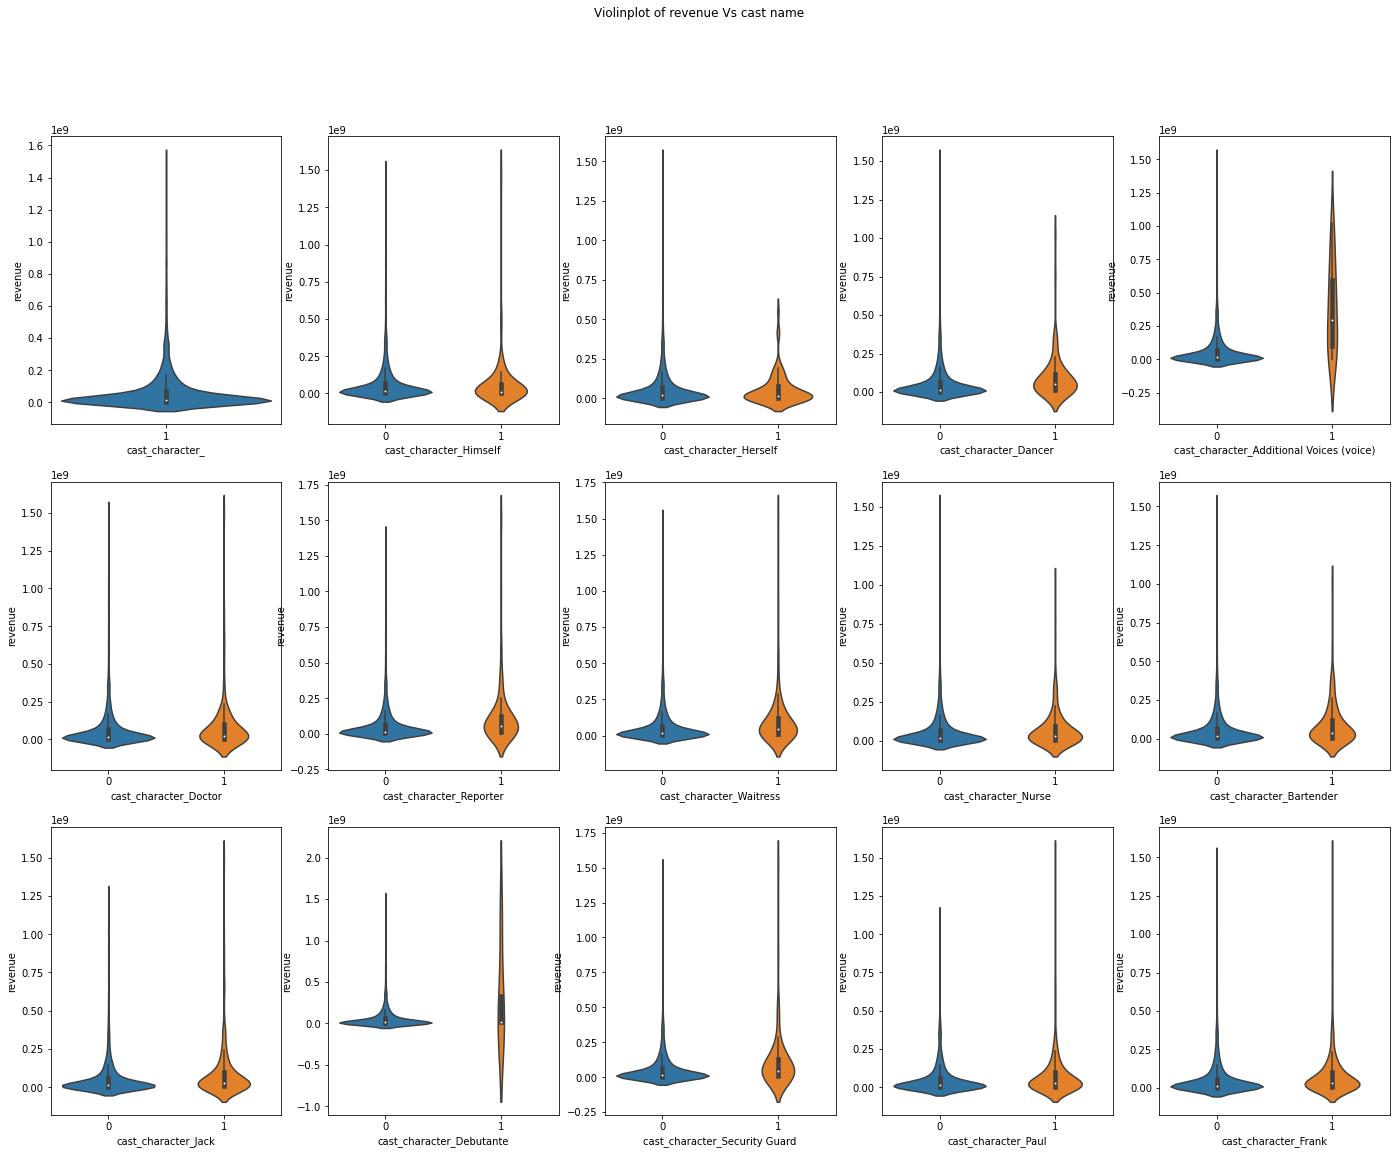

In [0]:
f, ax = plt.subplots(3, 5, figsize = (24, 18))
plt.suptitle('Violinplot of revenue Vs cast name')

for i, e in enumerate([col for col in train_df.columns if 'cast_character_' in col]):
  sns.violinplot(x =e, y = 'revenue', data = train_df, ax = ax[i//5, i%5])

plt.show()

* Above plot shows the contribution of each character name or type of character in the movies towards movie revenue.

##**Keywords**

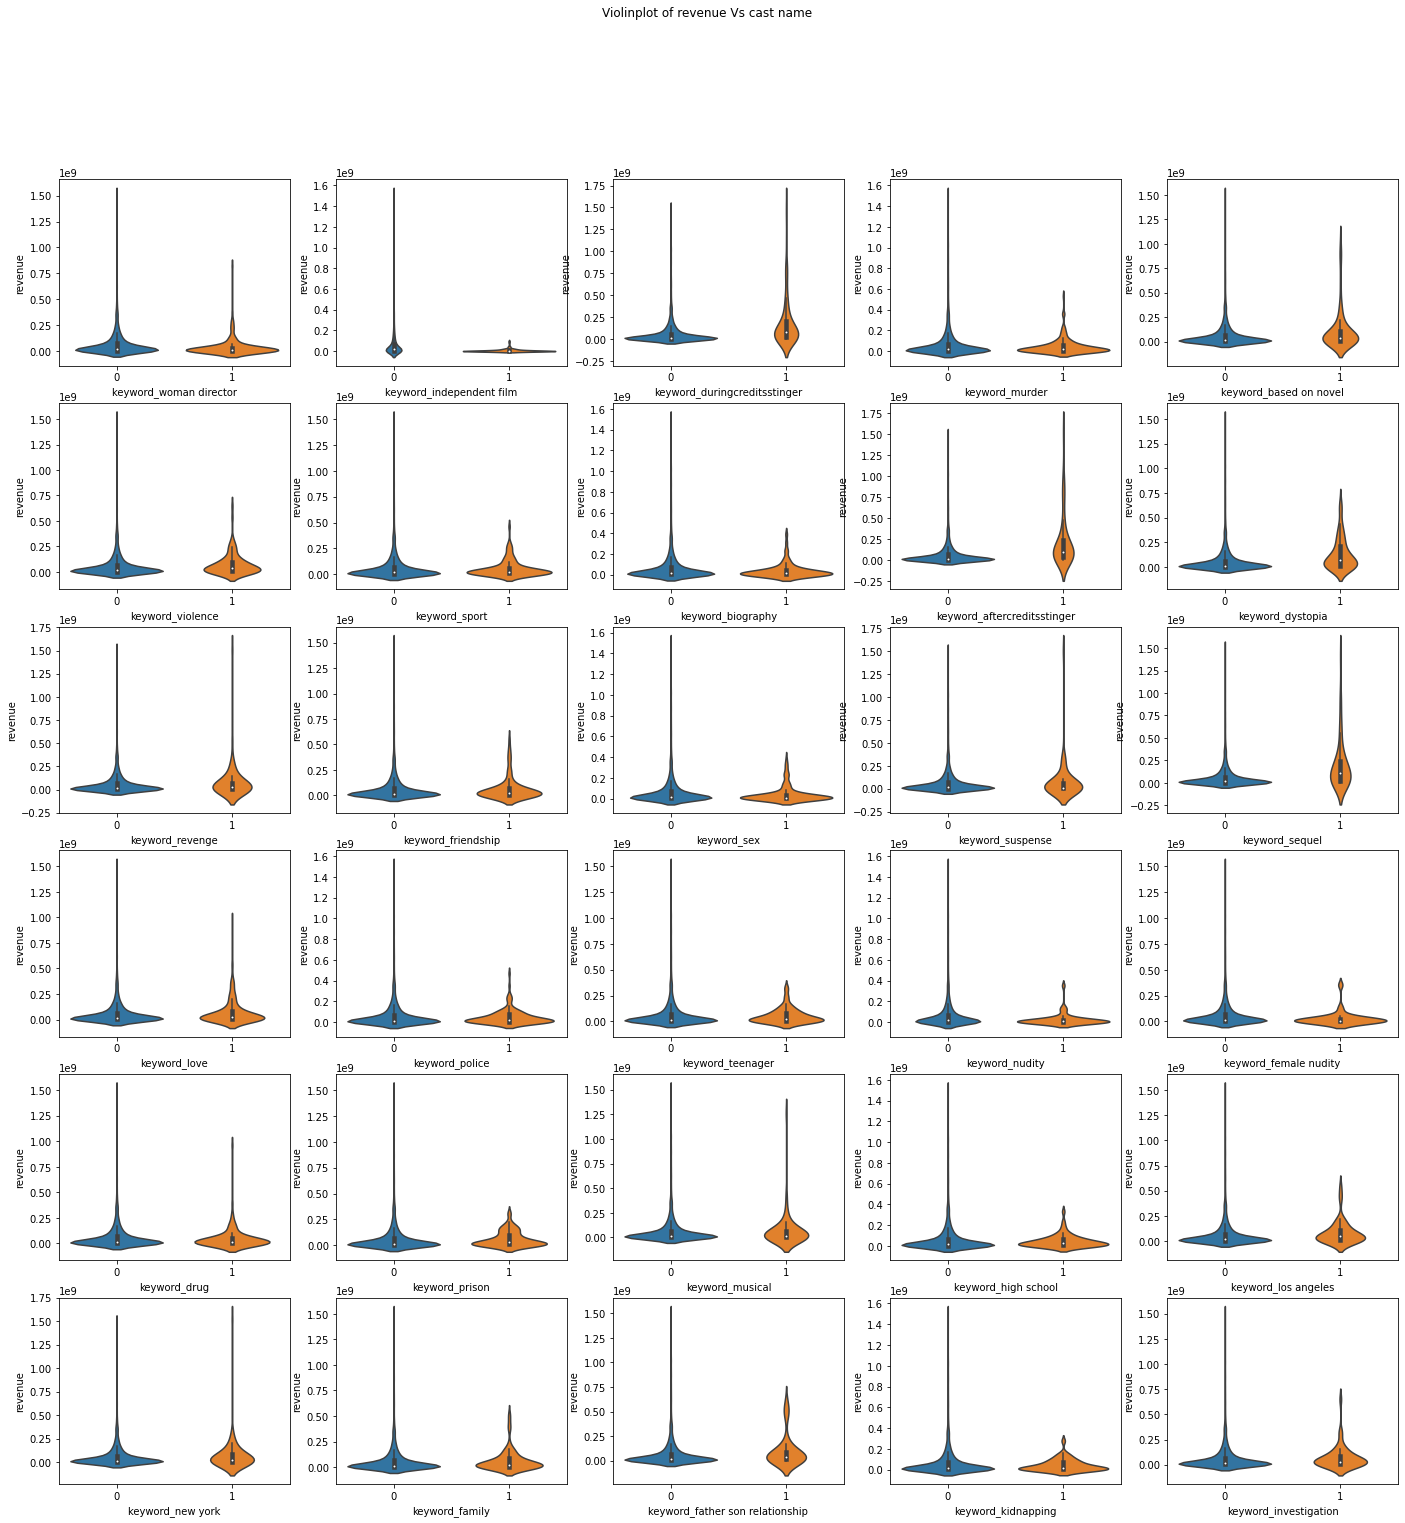

In [0]:
f, ax = plt.subplots(6, 5, figsize = (24, 24))
plt.suptitle('Violinplot of revenue Vs cast name')

for i, e in enumerate([col for col in train_df.columns if 'keyword_' in col]):
  sns.violinplot(x =e, y = 'revenue', data = train_df, ax = ax[i//5, i%5])

plt.show()

##**Crew**

In [0]:
for i in train_df.columns:
    print(i)

id
budget
homepage
imdb_id
original_language
original_title
overview
popularity
poster_path
release_date
runtime
status
tagline
title
revenue
Collection_name
has_collection
num_genres
all_genres
genre_Drama
genre_Comedy
genre_Thriller
genre_Action
genre_Romance
genre_Crime
genre_Adventure
genre_Horror
genre_Science Fiction
genre_Family
genre_Fantasy
genre_Mystery
genre_Animation
genre_History
genre_Music
num_companies
production_company_Warner Bros.
production_company_Universal Pictures
production_company_Paramount Pictures
production_company_Twentieth Century Fox Film Corporation
production_company_Columbia Pictures
production_company_Metro-Goldwyn-Mayer (MGM)
production_company_New Line Cinema
production_company_Touchstone Pictures
production_company_Walt Disney Pictures
production_company_Columbia Pictures Corporation
production_company_TriStar Pictures
production_company_Relativity Media
production_company_Canal+
production_company_United Artists
production_company_Miramax Films
pr

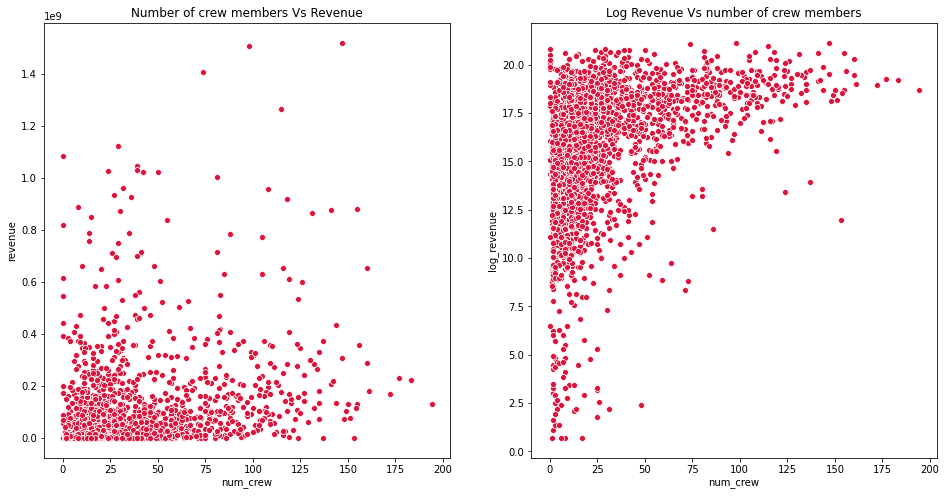

In [0]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.scatterplot(x = train_df['num_crew'], y = train_df['revenue'], color = 'crimson')
plt.title('Number of crew members Vs Revenue')

plt.subplot(1,2,2)
sns.scatterplot(x = train_df['num_crew'], y = train_df['log_revenue'], color = 'crimson')
plt.title('Log Revenue Vs number of crew members')

plt.show()

* There's no much relation between crew and revenue or log_revenue

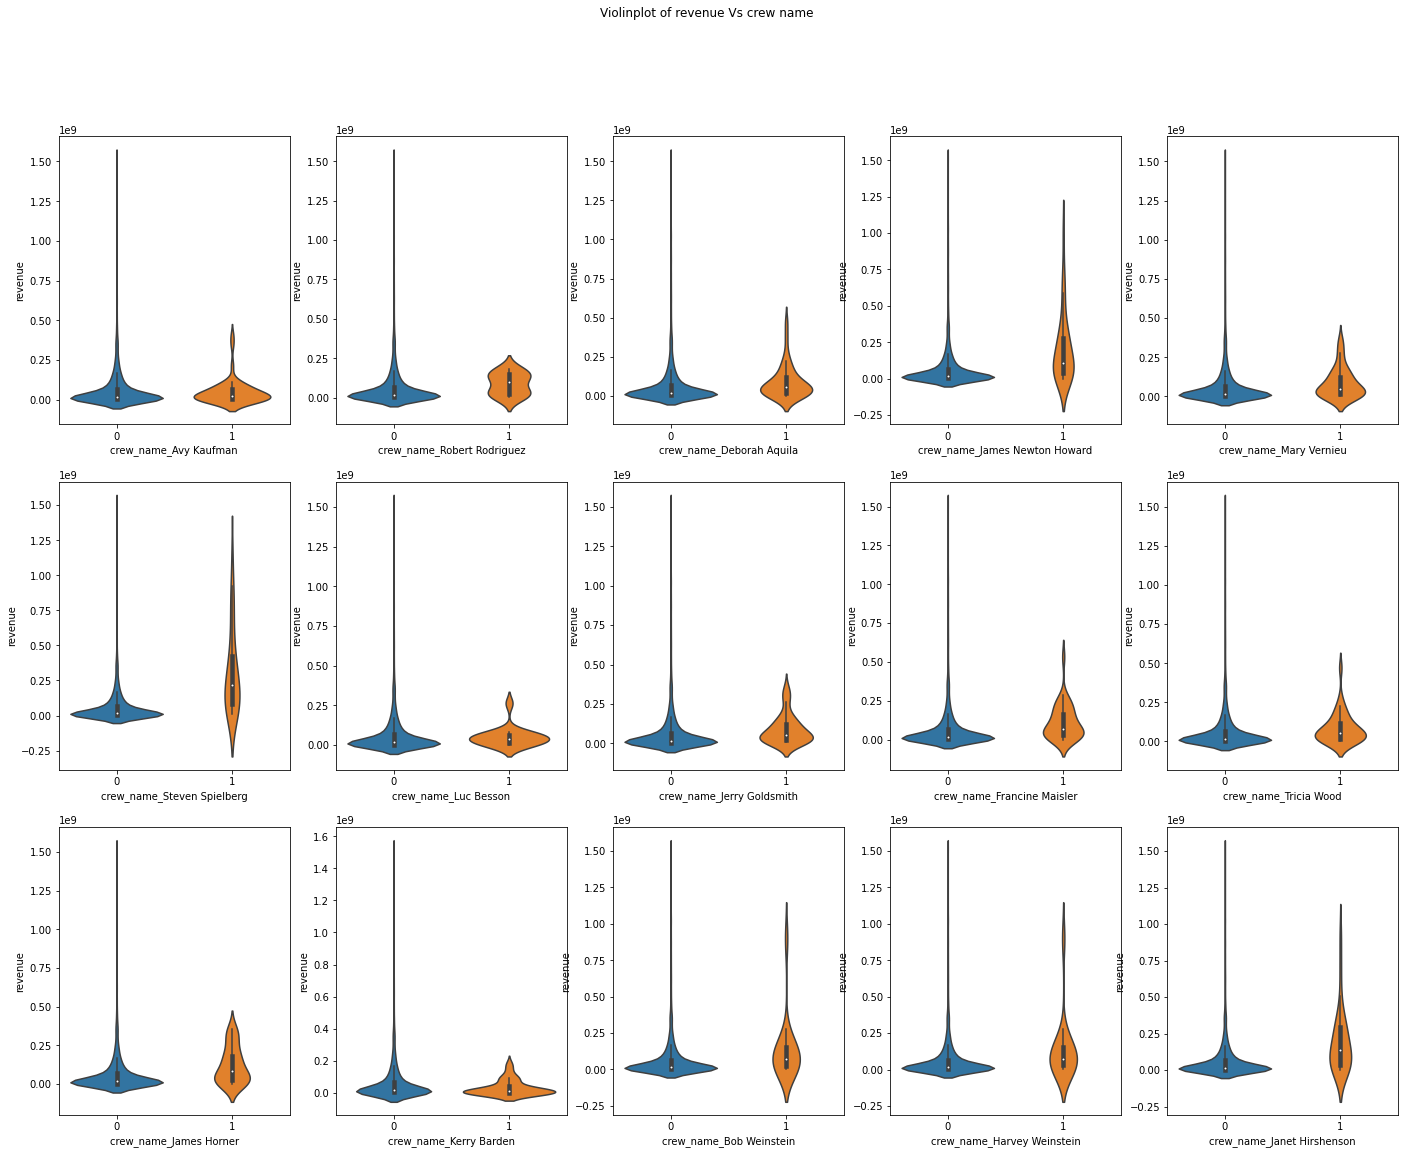

In [0]:
f, ax = plt.subplots(3, 5, figsize = (24, 18))
plt.suptitle('Violinplot of revenue Vs crew name')

for i, e in enumerate([col for col in train_df.columns if 'crew_name_' in col]):
  sns.violinplot(x =e, y = 'revenue', data = train_df, ax = ax[i//5, i%5])

plt.show()

#**Feature generation**

In [0]:
train_df = train_df.drop(['homepage', 'poster_path', 'release_date', 'status', 'log_revenue'], axis = 1)

test_df = test_df.drop(['homepage', 'poster_path', 'release_date', 'status'], axis = 1)

In [0]:
train_df.head(1)

,id,budget,imdb_id,original_language,original_title,overview,popularity,runtime,tagline,title,revenue,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,...,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.454568,0,2015,4,2,8,20,1


In [0]:
test_df.head()

,id,budget,imdb_id,original_language,original_title,overview,popularity,runtime,tagline,title,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,3001,0,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,90.0,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,Pokémon Collection,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,1,2007,5,7,28,14,3
1,3002,88000,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,65.0,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,None,0,2,Horror Science Fiction,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,6,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,2,1,0,0,1,1,1,1,1,0,0,0,11.385103,0,1958,0,5,21,19,2
2,3003,0,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,100.0,A Comedy About Lost Loves And Last Laughs,Addicted to Love,None,0,2,Comedy Romance,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,...,0,0,5,2,3,2,0,1,1,1,0,1,1,1,0,0,0,0,0,0,2,2,1,1,1,0,1,1,1,0,0,0,0.000000,0,1997,4,5,21,23,2
3,3004,6800000,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,130.0,The search began at the opening of their mothe...,Incendies,None,0,3,Drama Mystery War,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,...,0,0,53,5,11,1,0,1,0,1,3,1,1,0,1,1,2,2,0,1,13,14,6,9,3,7,3,2,3,6,3,0,15.732433,1,2010,5,9,35,4,3
4,3005,2000000,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,92.0,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,None,0,2,Documentary History,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,10,4,1,2,2,2,0,2,1,0,0,0,0,0,0,0,5,1,0,0,2,0,2,2,2,0,0,0,14.508658,0,2005,4,2,6,11,1


In [0]:
#removing some incorrect features
for col in train_df.columns:
  if train_df[col].nunique() == 1:
    print(col)
    train_df = train_df.drop([col], axis = 1)
    test_df = test_df.drop([col], axis =1)

languague_
cast_character_


In [0]:
train_df.head(2)

,id,budget,imdb_id,original_language,original_title,overview,popularity,runtime,tagline,title,revenue,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,Hot Tub Time Machine Collection,1,1,Comedy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,...,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.454568,0,2015,4,2,8,20,1
1,2,40000000,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,17.504390,0,2004,4,8,32,6,3


In [0]:
test_df.head(2)

,id,budget,imdb_id,original_language,original_title,overview,popularity,runtime,tagline,title,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,3001,0,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,90.0,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,Pokémon Collection,1,4,Adventure Animation Family Fantasy,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,1,2007,5,7,28,14,3
1,3002,88000,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,65.0,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,None,0,2,Horror Science Fiction,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,6,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,2,1,0,0,1,1,1,1,1,0,0,0,11.385103,0,1958,0,5,21,19,2


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
train_df['Collection_name'].replace('0',np.nan, inplace=True)
test_df['Collection_name'].replace('0',np.nan, inplace=True)

* **Encoding 'original_language' and 'collection_name' and 'all_genres'**

In [0]:
for col in ['original_language', 'Collection_name', 'all_genres']:
  le = LabelEncoder()
  #training the encoder on all available categories availabel in train and test datasets.
  le.fit(list(train_df[col].fillna('')) + list(test_df[col].fillna('')))

  train_df[col] = le.transform(train_df[col].fillna('').astype(str))
  test_df[col] = le.transform(test_df[col].fillna('').astype(str))

In [0]:
train_df.head(2)

,id,budget,imdb_id,original_language,original_title,overview,popularity,runtime,tagline,title,revenue,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,1,14000000,tt2637294,10,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,12314651,282,1,1,480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,...,0,0,59,0,13,1,3,1,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.454568,0,2015,4,2,8,20,1
1,2,40000000,tt0368933,10,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,95149435,641,1,4,516,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,4,4,3,1,1,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,17.504390,0,2004,4,8,32,6,3


In [0]:
test_df.head(2)

,id,budget,imdb_id,original_language,original_title,overview,popularity,runtime,tagline,title,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,...,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,gender_0_crew,gender_1_crew,gender_2_crew,jobs_Producer,jobs_Executive Producer,jobs_Director,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,3001,0,tt1226251,21,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,90.0,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,420,1,4,320,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,1,2007,5,7,28,14,3
1,3002,88000,tt0051380,10,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,65.0,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,0,0,2,789,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,6,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,2,1,0,0,1,1,1,1,1,0,0,0,11.385103,0,1958,0,5,21,19,2


* We didn't encode dates in our current as they are already in numerics. But we can try encoding them as the week days and dates occur in cyclic, we can do cyclic encoding.
* Lets proceed as is currently, after fixing the model, we'll try this method to see if score is getting any better.

In [0]:
train_texts = train_df[['title', 'tagline', 'overview', 'original_title']]
test_texts = test_df[['title', 'tagline', 'overview', 'original_title']]

In [0]:
for col in ['title', 'tagline', 'overview', 'original_title']:
  train_df['len_' + col] = train_df[col].fillna('').apply(lambda x: len(str(x)))
  train_df['words_' + col] = train_df[col].fillna('').apply(lambda x: len(str(x.split(' '))))
  train_df = train_df.drop(col, axis = 1)

  test_df['len_' + col] = test_df[col].fillna('').apply(lambda x: len(str(x)))
  test_df['words_' + col] = test_df[col].fillna('').apply(lambda x: len(str(x.split(' '))))
  test_df = test_df.drop(col, axis = 1)

In [0]:
train_df.head(2)

,id,budget,imdb_id,original_language,popularity,runtime,revenue,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,...,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter,len_title,words_title,len_tagline,words_tagline,len_overview,words_overview,len_original_title,words_original_title
0,1,14000000,tt2637294,10,6.575393,93.0,12314651,282,1,1,480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,4,2,9,10,12,4,2,13,8,4,2,4,4,0,16.454568,0,2015,4,2,8,20,1,22,38,52,86,155,243,22,38
1,2,40000000,tt0368933,10,8.248895,113.0,95149435,641,1,4,516,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0,0,0,4,1,0,0,1,0,1,1,1,0,0,0,17.504390,0,2004,4,8,32,6,3,40,59,60,100,393,601,40,59


In [0]:
test_df.head(2)

,id,budget,imdb_id,original_language,popularity,runtime,Collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,...,jobs_Screenplay,jobs_Editor,jobs_Casting,jobs_Director of Photography,jobs_Original Music Composer,jobs_Art Direction,jobs_Production Design,jobs_Costume Design,jobs_Writer,jobs_Set Decoration,jobs_Makeup Artist,jobs_Sound Re-Recording Mixer,departments_Production,departments_Sound,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter,len_title,words_title,len_tagline,words_tagline,len_overview,words_overview,len_original_title,words_original_title
0,3001,0,tt1226251,21,3.851534,90.0,420,1,4,320,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.000000,1,2007,5,7,28,14,3,28,44,51,79,335,507,18,22
1,3002,88000,tt0051380,10,3.559789,65.0,0,0,2,789,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0,1,0,2,1,0,0,1,1,1,1,1,0,0,0,11.385103,0,1958,0,5,21,19,2,27,46,96,145,162,250,27,46


In [0]:
for i in train_df.columns:
  print(i)

id
budget
imdb_id
original_language
popularity
runtime
revenue
Collection_name
has_collection
num_genres
all_genres
genre_Drama
genre_Comedy
genre_Thriller
genre_Action
genre_Romance
genre_Crime
genre_Adventure
genre_Horror
genre_Science Fiction
genre_Family
genre_Fantasy
genre_Mystery
genre_Animation
genre_History
genre_Music
num_companies
production_company_Warner Bros.
production_company_Universal Pictures
production_company_Paramount Pictures
production_company_Twentieth Century Fox Film Corporation
production_company_Columbia Pictures
production_company_Metro-Goldwyn-Mayer (MGM)
production_company_New Line Cinema
production_company_Touchstone Pictures
production_company_Walt Disney Pictures
production_company_Columbia Pictures Corporation
production_company_TriStar Pictures
production_company_Relativity Media
production_company_Canal+
production_company_United Artists
production_company_Miramax Films
production_company_Village Roadshow Pictures
production_company_Regency Enterpris

# **Saving the datasets**

In [0]:
#Saving the train data
train_df.to_parquet('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/IIstage_feat_train.parquet.gzip', compression = 'gzip')
train_texts.to_parquet('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/train_texts.parquet.gzip', compression = 'gzip')

#Saving the test data
test_df.to_parquet('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/IIstage_feat_test.parquet.gzip', compression = 'gzip')
test_texts.to_parquet('/content/drive/My Drive/Colab Notebooks/Works/TMDB Prediction/data/test_texts.parquet.gzip', compression = 'gzip')